In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pixell import enmap, reproject, enplot
from matplotlib import cm
from astropy.io import fits
import matplotlib.patches as patches
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u
import multiprocessing as multi
from PIL import Image

In [2]:
%%capture PC_name 
!hostname

**Setting notebook parameters**

In [3]:
#setting dots per inch for images
dpi = 90

#setting number of processors for multiprocessing
PC_name_str = PC_name.stdout[0:-2]

if (PC_name_str == 'arc10'or PC_name_str == 'science11' or 
        PC_name_str == 'science10'):
    cores = 84        
#     cores = multi.cpu_count()
    
else:
    cores = multi.cpu_count()

print(PC_name_str)
print(cores)

arc10
84


In [4]:
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

In [5]:
radius = 100
cell_size = 10000
df_clus = pd.read_csv(f'../Data/with_vels/z_gt_4_lt_7_{radius}_{cell_size}.csv',
                                           index_col = 0)

df_clus.describe()

,RADeg,decDeg,redshift,M500c,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h],min_gals_beyond_cube,x_comov[kpc/h],...,z_comov[kpc/h],vx_est[km/s],vy_est[km/s],vz_est[km/s],vx_est_err[km/s],vy_est_err[km/s],vz_est_err[km/s],r_mag[kpc/h],v_los_est[km/s],v_los_est_err[km/s]
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000
mean,173.362799,9.271431,0.543286,2.428165,1409.205809,-334.675664,-117.509230,224.709713,935.432598,-3.346757e+05,...,224709.713145,52.601948,30.011556,-7.938981,807.382690,807.223189,807.430031,1.409206e+06,-136.547665,807.650130
std,96.469920,6.593443,0.085228,0.833871,188.526091,1151.074233,704.100133,163.045535,913.572592,1.151074e+06,...,163045.534876,552.583259,522.068243,535.169619,5155.850799,5155.890263,5155.944181,1.885261e+05,586.967348,5155.850606
min,0.113533,-7.212461,0.400034,1.346285,1082.729740,-1678.862998,-1576.734980,-192.954962,1.000000,-1.678863e+06,...,-192954.961723,-1800.382627,-1876.295835,-1681.683719,188.781360,188.518320,191.005171,1.082730e+06,-2175.639686,189.864407
25%,130.438011,4.531858,0.465624,1.854325,1237.983342,-1248.061199,-721.819653,102.346756,176.500000,-1.248061e+06,...,102346.755794,-279.897845,-264.576758,-303.963170,342.600970,343.263597,342.918887,1.237983e+06,-482.530759,343.515976
50%,188.726736,9.881831,0.543665,2.216333,1414.909261,-931.028445,-120.875454,239.961509,607.000000,-9.310284e+05,...,239961.509234,60.412578,45.565536,5.098781,440.978348,438.781787,440.522434,1.414909e+06,-123.242683,440.854519
75%,226.267186,14.616706,0.617660,2.806740,1575.104001,1114.885175,466.359988,352.028039,1471.250000,1.114885e+06,...,352028.038550,382.445984,351.591726,294.422619,636.040260,636.353627,637.085386,1.575104e+06,222.324552,634.550866
max,359.887357,20.232140,0.699912,8.222190,1744.907409,1721.115421,1464.920940,566.020959,3727.000000,1.721115e+06,...,566020.959365,1942.635752,1625.707446,4275.307977,137128.973085,137128.753598,137129.932608,1.744907e+06,2428.783630,137128.923275


In [167]:
# min_gals_beyond_cube = []
# for i in df_clus['gals_beyond_250Mpc']:
#     nums_int_list = []
#     nums = i.split(',')
#     for num in nums:
#         num = num.lstrip('[').rstrip(']')
#         nums_int_list.append(int(num))
#     min_gals_beyond_cube.append(min(nums_int_list))
    
# df_clus['min_gals_beyond_cube'] = min_gals_beyond_cube

# df_clus = df_clus[df_clus['min_gals_beyond_cube'] > 200]
# df_clus['min_gals_beyond_cube']

# df_clus.describe()

In [6]:
path = '/vol/arc10/data1/amirza/Thesis_Unsync/ACT_Data/compsep_maps/'
# CMB_kSZ_BN = enmap.read_map(path + "tilec_single_tile_BN_cmb_map_v1.2.0_joint.fits")
CMB_kSZ_deproject_tsz_BN = enmap.read_map(path + "tilec_single_tile_BN_cmb_deprojects_comptony_map_v1.2.0_joint.fits")

In [7]:
print(CMB_kSZ_deproject_tsz_BN.shape)
print(CMB_kSZ_deproject_tsz_BN.wcs)

(3549, 12250)
car:{cdelt:[-0.008333,0.008333],crval:[182.5,0],crpix:[7798,748]}


In [8]:
dec_min,ra_min = np.rad2deg(enmap.pix2sky(CMB_kSZ_deproject_tsz_BN.shape,
                           CMB_kSZ_deproject_tsz_BN.wcs,
                           np.array((0, 0))))
print(dec_min,ra_min)

-6.224999999997501 -112.533333333286


In [9]:
dec_max, ra_max = np.rad2deg(enmap.pix2sky(CMB_kSZ_deproject_tsz_BN.shape,
                           CMB_kSZ_deproject_tsz_BN.wcs,
                           np.array(CMB_kSZ_deproject_tsz_BN.shape)))
print(dec_max, ra_max)

23.34999999999066 145.38333333342152


In [10]:
hdul = fits.open(path + "tilec_single_tile_BN_cmb_deprojects_comptony_map_v1.2.0_joint.fits")
# hdul[1].header
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                12250                                                  
NAXIS2  =                 3549                                                  
CRPIX1  =               7798.0 / Pixel coordinate of reference point            
CRPIX2  =                748.0 / Pixel coordinate of reference point            
CDELT1  =    -0.00833333333333 / [deg] Coordinate increment at reference point  
CDELT2  =     0.00833333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---CAR'           / Right ascension, plate caree projection        
CTYPE2  = 'DEC--CAR'        

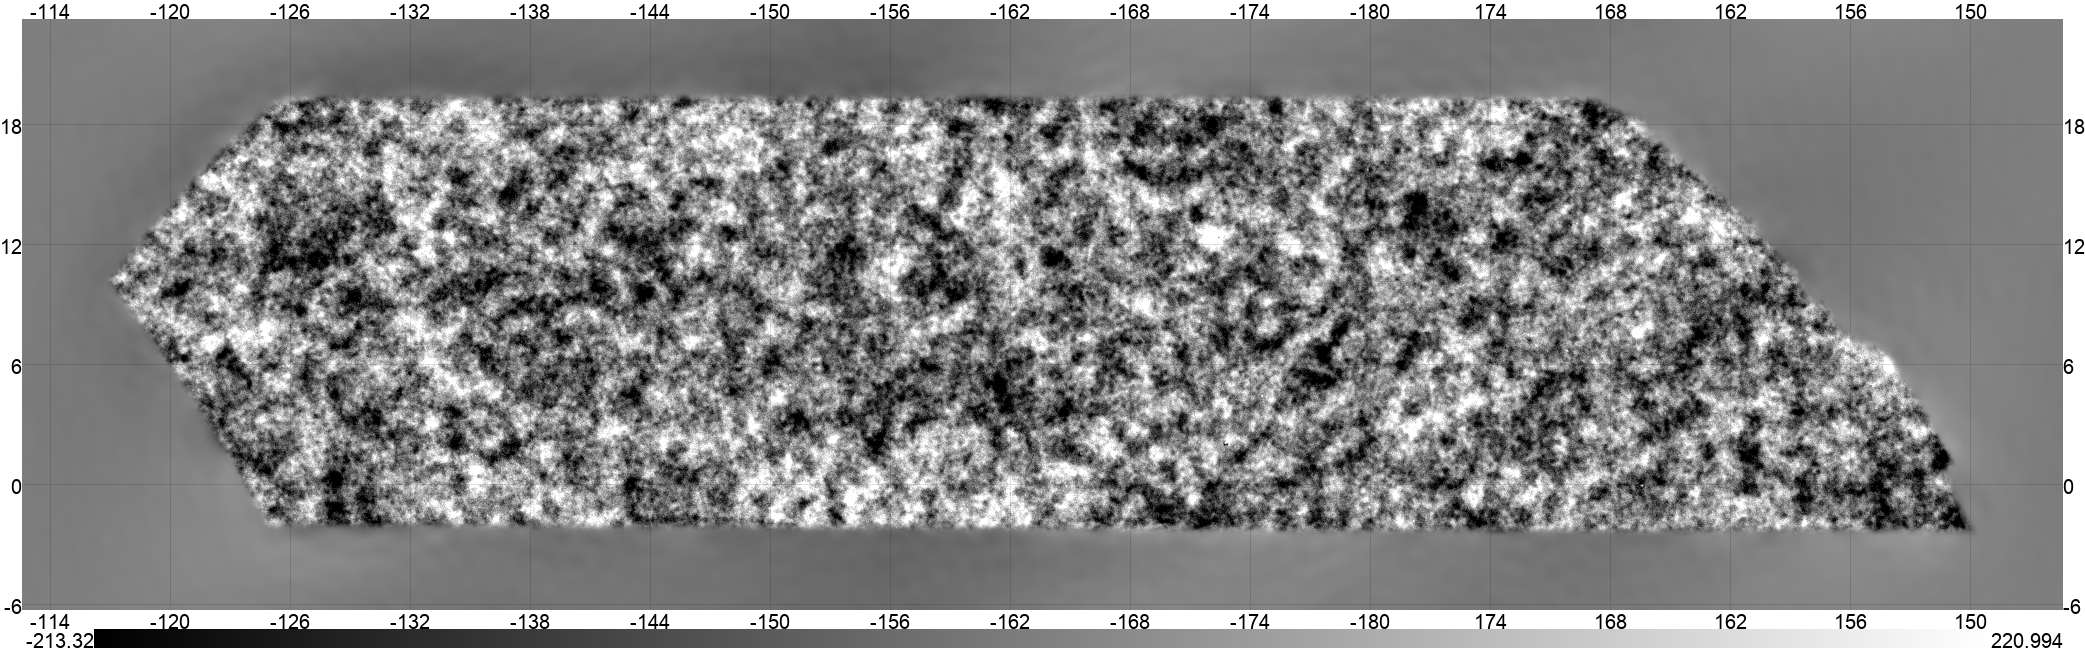

In [173]:
eshow(CMB_kSZ_deproject_tsz_BN, **{'downgrade': 6, 'ticks': 6, 'color': 'gray', 'colorbar': True})

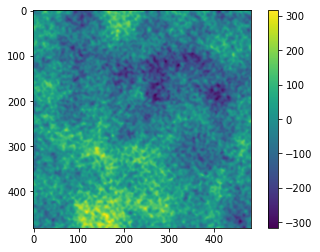

In [174]:
cutout = reproject.thumbnails(CMB_kSZ_deproject_tsz_BN ,coords = np.deg2rad([12, 210]),r = 60*np.pi/180/60)
plt.imshow(cutout)
plt.colorbar()

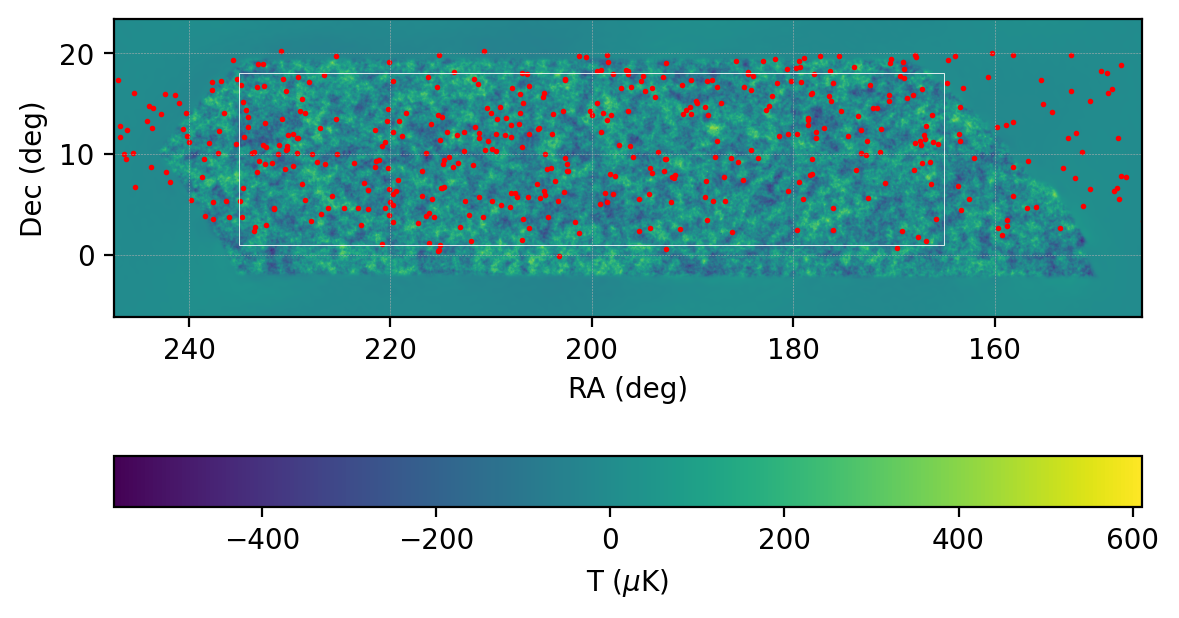

In [11]:
plt.figure(dpi = 200)

plt.scatter(df_clus['RADeg'], df_clus['decDeg'], c = 'r', s = 1)

# plt.scatter(220, 0, c = 'cyan')

plt.imshow(CMB_kSZ_deproject_tsz_BN, origin = 'lower',
           extent = [ra_min + 360, ra_max , dec_min, dec_max])
plt.colorbar(label = 'T ($\mu$K)', orientation = 'horizontal', pad = 0.2)



plt.xlim(ra_min + 360, ra_max)
plt.ylim(dec_min, dec_max)

rect = patches.Rectangle((235, 1), -70, 17, linewidth=0.3, edgecolor='white', facecolor='none')
plt.gca().add_patch(rect)

plt.grid(ls = 'dashed', lw = 0.2)

plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)');

plt.tight_layout()
# plt.savefig('Plots/BN_clusters_overlap.pdf')

**14 Sept 2021**  
- (tSZ) deprojected maps are noiser (penalty of ILC) but they're the best we can use here. 
- Unfortunate that ACT released only 1/8th of their tSZ deprojected maps. Deprojecting tSZ from freq maps is possible but takes time. Can use Planck for more realistic results.
- **Task** Multiple smaller reactangles can be used with map.
- Don't make stack of one sided velocities. For opposite side, just flip it. It is mass times velocity which is momentum. You divide (actually multiply) the positive momentum by positive velocity or negative momentum by negative velocity. One can take the sign of the velocity and multiply by that sign. That's absolute momentum. The, we gets roughly 40% better signal to noise because we're sampling up.
- Don't use value of velocity, just the sign.
- **Task** We are after the optical depth, the mass, not the momentum. We will use the magnitude of the velocities. If we divide (the momentum we have) by the velocity, including its sign, we're left with tau.

In [13]:
msol_mpc = u.Msun / (u.Mpc * u.Mpc * u.Mpc)
rho_cric = cosmo.critical_density(0.5)
rho_cric.to(msol_mpc)

<Quantity 2.20960565e+11 solMass / Mpc3>

In [14]:
rho_cric

<Quantity 1.49544018e-29 g / cm3>

In [15]:
msol_mpc = u.Msun / (u.Mpc * u.Mpc * u.Mpc)
R_500c_Mpc = np.cbrt((3/(4*np.pi)) * (df_clus['M500c'].values * 10**14 * u.Msun / 
                      (500*cosmo.critical_density(df_clus['redshift']).to(msol_mpc))))
df_clus['R500c[Mpc/h]'] = R_500c_Mpc.to(u.Mpc/u.littleh, u.with_H0(cosmo.H0)).value

df_clus['D_ang[Mpc/h]'] = df_clus['r_comov[Mpc/h]'] / (1 + df_clus['redshift'])

df_clus['theta500c[rad]'] = df_clus['R500c[Mpc/h]'] / df_clus['D_ang[Mpc/h]']

df_clus.describe()

,RADeg,decDeg,redshift,M500c,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h],min_gals_beyond_cube,x_comov[kpc/h],...,vz_est[km/s],vx_est_err[km/s],vy_est_err[km/s],vz_est_err[km/s],r_mag[kpc/h],v_los_est[km/s],v_los_est_err[km/s],R500c[Mpc/h],D_ang[Mpc/h],theta500c[rad]
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,...,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000
mean,173.362799,9.271431,0.543286,2.428165,1409.205809,-334.675664,-117.509230,224.709713,935.432598,-3.346757e+05,...,-7.938981,807.382690,807.223189,807.430031,1.409206e+06,-136.547665,807.650130,0.530604,909.153767,0.000589
std,96.469920,6.593443,0.085228,0.833871,188.526091,1151.074233,704.100133,163.045535,913.572592,1.151074e+06,...,535.169619,5155.850799,5155.890263,5155.944181,1.885261e+05,586.967348,5155.850606,0.057408,72.195446,0.000089
min,0.113533,-7.212461,0.400034,1.346285,1082.729740,-1678.862998,-1576.734980,-192.954962,1.000000,-1.678863e+06,...,-1681.683719,188.781360,188.518320,191.005171,1.082730e+06,-2175.639686,189.864407,0.424316,773.359476,0.000423
25%,130.438011,4.531858,0.465624,1.854325,1237.983342,-1248.061199,-721.819653,102.346756,176.500000,-1.248061e+06,...,-303.963170,342.600970,343.263597,342.918887,1.237983e+06,-482.530759,343.515976,0.487839,844.679899,0.000522
50%,188.726736,9.881831,0.543665,2.216333,1414.909261,-931.028445,-120.875454,239.961509,607.000000,-9.310284e+05,...,5.098781,440.978348,438.781787,440.522434,1.414909e+06,-123.242683,440.854519,0.520487,916.590780,0.000584
75%,226.267186,14.616706,0.617660,2.806740,1575.104001,1114.885175,466.359988,352.028039,1471.250000,1.114885e+06,...,294.422619,636.040260,636.353627,637.085386,1.575104e+06,222.324552,634.550866,0.562565,973.692846,0.000638
max,359.887357,20.232140,0.699912,8.222190,1744.907409,1721.115421,1464.920940,566.020959,3727.000000,1.721115e+06,...,4275.307977,137128.973085,137128.753598,137129.932608,1.744907e+06,2428.783630,137128.923275,0.804205,1026.469318,0.000984


In [16]:
print(np.rad2deg(df_clus['theta500c[rad]']).max() * 60)
print(np.rad2deg(df_clus['theta500c[rad]']).min() * 60)

3.381519022585555
1.4553707596628511


In [17]:
def bin_stamp(data2d, modrmap, bin_edges):
    '''gives the centers and averages for radial bins of a 2d plot'''
    #get centers of each bin
    centers = (bin_edges[1:]+bin_edges[:-1])/2.
    
    #sort indices by corresponding radial bin
    digitized = np.digitize(modrmap.reshape(-1), bin_edges,right=True)

    #get average of each radial bin
    count = np.bincount(digitized)[1:-1]
    res = np.bincount(digitized,(data2d).reshape(-1))[1:-1]/count
    return centers,res

In [182]:
ras  = df_clus['RADeg'].values
decs = df_clus['decDeg'].values
vels = df_clus['v_los_est[km/s]'].values
theta_500c = df_clus['theta500c[rad]'].values

def stack_clus_temp(mode = 'only_positive'):
    
    N = len(ras)
    stack_CMB_kSZ_deproject = 0
    c = 0
    
#     if_execute = 

    for i in range(N):
        if (1 < decs[i] < 18) and (165 < ras[i] < 235):          

            stamp_deproject = reproject.thumbnails(CMB_kSZ_deproject_tsz_BN,
                                                   coords = np.deg2rad([decs[i], ras[i]]), 
#                                                    r = 6 * theta_500c[i],
                                                   r = 15*np.pi/180/60)
            if (mode == 'all_flipped'):
                if (vels[i] > 0):
                    stack_CMB_kSZ_deproject -= stamp_deproject
                if (vels[i] < 0):
                    stack_CMB_kSZ_deproject += stamp_deproject
                c += 1
                
            if (mode == 'all_unflipped'):
                stack_CMB_kSZ_deproject += stamp_deproject
                c += 1
            
            if (vels[i] > 0 and mode == 'only_positive'):
                stack_CMB_kSZ_deproject -= stamp_deproject
                c += 1
                
            if (vels[i] < 0 and mode == 'only_negative'):
                stack_CMB_kSZ_deproject += stamp_deproject
                c += 1
                
            
#             if (vels[i] < 0):
#             stack_CMB_kSZ_deproject += stamp_deproject_pos/abs(vels[i])
#             stack_CMB_kSZ_deproject += stamp_deproject_pos/vels[i]
#             c += 1


    # Normalize the stamps
    stack_CMB_kSZ_deproject /= c
    print(c)
    
    return stack_CMB_kSZ_deproject, c

(75, 75)
13.081412312989354 0.0


(300, 300)
13.1206875 0.014476559


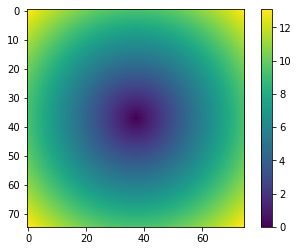

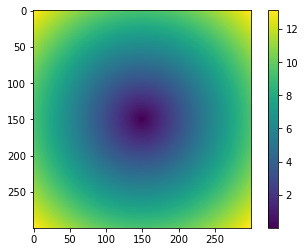

In [183]:
print(radii.shape)
plt.imshow(radii)
plt.colorbar()
print(np.max(radii), np.min(radii))

print('\n')

plt.figure()
radii_2 = np.array(Image.fromarray(radii).resize(size = (300,300)))
plt.imshow(radii_2)
plt.colorbar()
print(radii_2.shape)
print(np.max(radii_2), np.min(radii_2))

In [20]:
ras  = df_clus['RADeg'].values
decs = df_clus['decDeg'].values
vels = df_clus['v_los_est[km/s]'].values
theta_500c = df_clus['theta500c[rad]'].values

def stack_clus(max_shape, mode = 'only_positive'):
    
    N = len(ras)
    stack_CMB_kSZ_deproject = 0
    c = 0
    

    for i in range(N):
        if (1 < decs[i] < 18) and (165 < ras[i] < 235):          

            stamp_deproject = reproject.thumbnails(CMB_kSZ_deproject_tsz_BN,
                                                   coords = np.deg2rad([decs[i], ras[i]]), 
                                                   r = 6 * theta_500c[i])
            
            stamp_deproject = stamp_deproject - np.mean(stamp_deproject)
            
            stamp_deproject = np.array(Image.fromarray(stamp_deproject).resize(size = max_shape))
            
            if (mode == 'all_flipped'):
                if (vels[i] > 0):
                    stack_CMB_kSZ_deproject -= stamp_deproject
                if (vels[i] < 0):
                    stack_CMB_kSZ_deproject += stamp_deproject
                c += 1
                
            if (mode == 'all_unflipped'):
                stack_CMB_kSZ_deproject += stamp_deproject
                c += 1
            
            if (vels[i] > 0 and mode == 'only_positive'):
                stack_CMB_kSZ_deproject -= stamp_deproject
                c += 1
                
            if (vels[i] < 0 and mode == 'only_negative'):
                stack_CMB_kSZ_deproject += stamp_deproject
                c += 1
                
            
#             if (vels[i] < 0):
#             stack_CMB_kSZ_deproject += stamp_deproject_pos/abs(vels[i])
#             stack_CMB_kSZ_deproject += stamp_deproject_pos/vels[i]
#             c += 1


    # Normalize the stamps
    stack_CMB_kSZ_deproject /= c
    print(c)
    
    return stack_CMB_kSZ_deproject, c

In [19]:
stamp_for_max_shape_and_rad = reproject.thumbnails(CMB_kSZ_deproject_tsz_BN,
                                   coords = np.deg2rad([decs[150], ras[150]]), 
                                   r = 6 * theta_500c.max())
max_shape = stamp_for_max_shape_and_rad.shape
max_shape

(163, 163)

In [216]:
# stack_with_sign, clus_with_sign = stack_clus()
stack_flip, clus_flip = stack_clus(max_shape, mode = 'all_flipped')

248


In [217]:
stack_all, clus_all = stack_clus(max_shape, mode = 'all_unflipped')

248


In [218]:
stack_pos, clus_pos = stack_clus(max_shape, mode = 'only_positive')

64


In [219]:
stack_neg, clus_neg = stack_clus(max_shape, mode = 'only_negative')

184


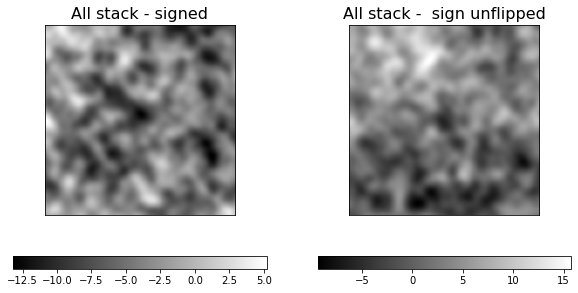

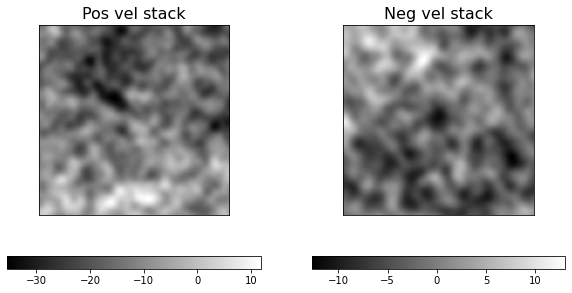

In [220]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_flip, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("All stack - signed", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0], orientation='horizontal')

f2 = ax[1].imshow(stack_all, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("All stack -  sign unflipped", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_pos, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Pos vel stack", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0], orientation='horizontal')

f2 = ax[1].imshow(stack_neg, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Neg vel stack", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

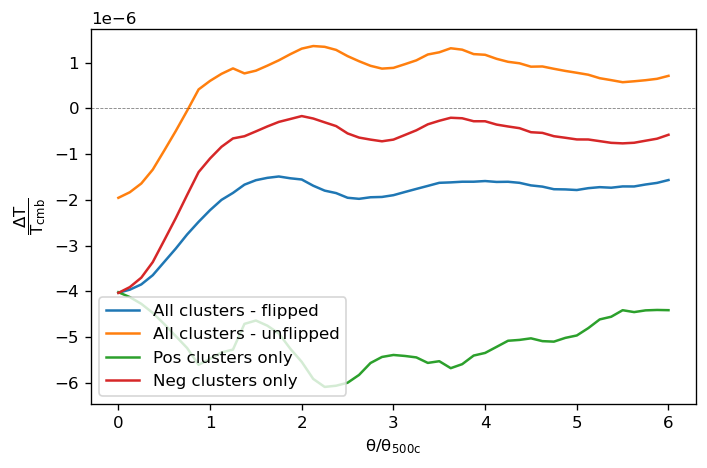

In [221]:
# Set the number of bins
N_bins = 50

# stamp_deproject = reproject.thumbnails(CMB_kSZ_deproject_tsz_BN,
#                                                    coords = np.deg2rad([decs[50], ras[50]]), 
#                                                    r = 15*np.pi/180/60)

# Call the function modrmap that stores the radii in degrees (guess: radians) of each pixel from the center
radii = enmap.modrmap(stamp_for_max_shape_and_rad.shape, 
                      stamp_for_max_shape_and_rad.wcs) * 180/np.pi * 60

# Determine the bounds for the bins
r_max = np.max(radii)
r_min = np.min(radii)

# r_edge is the radius of the largest circle that can fit entirely within the box
r_edge = r_max/np.sqrt(2)

step = (r_edge - r_min)/N_bins

# Create the bin edges
bin_edges = np.arange(r_min, r_edge, step)

# Use the binner function to get the average temp for each radius
# x_with_sign, T_avg_with_sign = bin_stamp(stack_with_sign, radii, bin_edges)
x_flip, T_avg_flip = bin_stamp(stack_flip, radii, bin_edges)
x_all, T_avg_all = bin_stamp(stack_all, radii, bin_edges)
x_pos, T_avg_pos = bin_stamp(stack_pos, radii, bin_edges)
x_neg, T_avg_neg = bin_stamp(stack_neg, radii, bin_edges)

T_cmb = 2.72548e6

x_axis = np.linspace(0, 6, len(x_all))

plt.figure(dpi = 120)
plt.plot(x_axis, T_avg_flip/T_cmb, label = 'All clusters - flipped')
plt.plot(x_axis, T_avg_all/T_cmb, label = 'All clusters - unflipped')
plt.plot(x_axis, T_avg_pos/T_cmb, label = 'Pos clusters only')
plt.plot(x_axis, T_avg_neg/T_cmb, label = 'Neg clusters only')
plt.axhline(y = 0, color = 'k', lw = 0.5, alpha = 0.5, ls = 'dashed')
# plt.xlabel(r"$\mathrm{\dfrac{\theta}{\theta_{500c}}}$")
plt.xlabel(r"$\mathrm{\theta / \theta_{500c}}$")
plt.ylabel("$\mathrm{\dfrac{\Delta T}{ T _{cmb}}}$")
plt.legend()
# plt.title('From scaled cluster patches');
plt.tight_layout()
plt.savefig('Plots/stacked_profile_without_error.pdf')

**15 Sep 2021**  
- Tanimura have less massive clusters (2 or 3 times) and their data is convolved with 10 arcmin Planck beam. Both of these reduce their signal. ACT beam is 8 times better. 
- kSZ signal is of the order of 10 micro Kelvin, 10 times less than tSZ (100 micro Kelvin).
- ACT have galaxies halos which are order of magnitude less massive. So their signal is small. They plotted area integral, like integrated over ring. One has to divide by the size (of ring) to compare. 
- The profiles are incomplete. Have to bin the profile and report the errors.


In [222]:
ras  = df_clus['RADeg'].values
decs = df_clus['decDeg'].values
vels = df_clus['v_los_est[km/s]'].values
theta_500c = df_clus['theta500c[rad]'].values

def stack_noise_clus(max_shape, ra_shift, dec_shift, radii, bin_edges, mode):
    
    N = len(ras)
    stack_noise_CMB = 0
    c = 0
    
    for i in range(N):
        if (1 < decs[i] < 18) and (165 < ras[i] < 235):          

            stamp_noise_deproject = reproject.thumbnails(CMB_kSZ_deproject_tsz_BN,
                                    coords = np.deg2rad([decs[i] + ra_shift, 
                                                         ras[i] + dec_shift]), 
                                                         r = 6 * theta_500c[i])
            
            stamp_noise_deproject = np.array(Image.fromarray(stamp_noise_deproject).resize(size = max_shape))
            
            if (mode == 'all_flipped'):
                if (vels[i] > 0):
                    stack_noise_CMB -= stamp_noise_deproject
                if (vels[i] < 0):
                    stack_noise_CMB += stamp_noise_deproject
                c += 1
                
            if (mode == 'all_unflipped'):
                stack_noise_CMB += stamp_noise_deproject
                c += 1
            
            if (vels[i] > 0 and mode == 'only_positive'):
                stack_noise_CMB -= stamp_noise_deproject
                c += 1
                
            if (vels[i] < 0 and mode == 'only_negative'):
                stack_noise_CMB += stamp_noise_deproject
                c += 1
                
            
#             if (vels[i] < 0):
#             stack_CMB_kSZ_deproject += stamp_deproject_pos/abs(vels[i])
#             stack_CMB_kSZ_deproject += stamp_deproject_pos/vels[i]
#             c += 1


    # Normalize the stamps
    stack_noise_CMB /= c

    x_noise_bin, T_noise_bin = bin_stamp(stack_noise_CMB, radii, bin_edges)
    
    return T_noise_bin

In [223]:
# Set the number of bins
N_bins = 11

# stamp_noise_radi = reproject.thumbnails(CMB_kSZ_deproject_tsz_BN,
#                                     coords = np.deg2rad([decs[50], ras[50]]), 
#                                                          r = 15*np.pi/180/60)

# # Call the function modrmap that stores the radii in degrees (guess: radians) of each pixel from the center
radii = enmap.modrmap(stamp_for_max_shape_and_rad.shape, 
                      stamp_for_max_shape_and_rad.wcs) * 180/np.pi * 60

# Determine the bounds for the bins
r_max = np.max(radii)
r_min = np.min(radii)

# r_edge is the radius of the largest circle that can fit entirely within the box
r_edge = r_max/np.sqrt(2)

step = (r_edge - r_min)/N_bins

# Create the bin edges
bin_edges = np.arange(r_min, r_edge, step)

In [224]:
def obtain_errors(max_shape, mode):
    N_realizations = 500
    noise_bins_matrix = np.zeros((N_bins-1, N_realizations))

#     ra_shifts = np.random.uniform(-3, 3, N_realizations)
#     dec_shifts = np.random.uniform(-3, 3, N_realizations)
    
    angles = np.random.uniform(0, 360, N_realizations)
    ra_shifts = 2 * np.cos(np.deg2rad(angles))
    dec_shifts = 2 * np.sin(np.deg2rad(angles))
    
    pool_param = list(zip([max_shape]* N_realizations,
                          ra_shifts, dec_shifts, 
                          [radii] * N_realizations,
                          [bin_edges] * N_realizations,
                          [mode] * N_realizations))

    pool = multi.Pool(processes = cores)
    pool_output = pool.starmap(stack_noise_clus, pool_param)

    print('Noise profiles obtained')

    for i, noise_profile in enumerate(pool_output):
        noise_bins_matrix[:, i] = noise_profile

    cov_matrix = np.cov(noise_bins_matrix)
    errors = np.sqrt(np.diagonal(cov_matrix))
    
    return errors

In [225]:
errors_all_flip = obtain_errors(max_shape, 'all_flipped')

Noise profiles obtained


In [226]:
errors_all_unflip = obtain_errors(max_shape, 'all_unflipped')

Noise profiles obtained


In [227]:
errors_pos = obtain_errors(max_shape, 'only_positive')

Noise profiles obtained


In [228]:
errors_neg = obtain_errors(max_shape, 'only_negative')

Noise profiles obtained


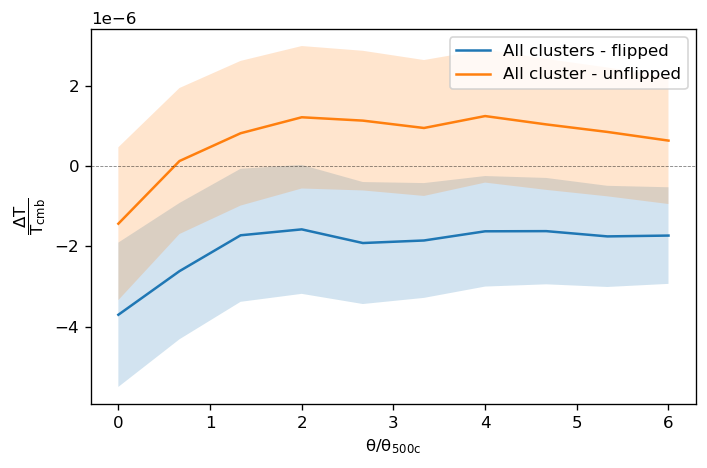

In [229]:
# Use the binner function to get the average temp for each radius
x_flip, T_avg_flip = bin_stamp(stack_flip, radii, bin_edges)
x_all, T_avg_all = bin_stamp(stack_all, radii, bin_edges)
x_pos, T_avg_pos = bin_stamp(stack_pos, radii, bin_edges)
x_neg, T_avg_neg = bin_stamp(stack_neg, radii, bin_edges)

x_axis = np.linspace(0, 6, len(x_all))

plt.figure(dpi = 120)
plt.plot(x_axis, T_avg_flip/T_cmb, 
             label = 'All clusters - flipped')
plt.fill_between(x_axis, T_avg_flip/T_cmb - errors_all_flip/T_cmb, 
                 T_avg_flip/T_cmb + errors_all_flip/T_cmb, alpha=0.2)
plt.plot(x_axis, T_avg_all/T_cmb, 
         label = 'All cluster - unflipped')
plt.fill_between(x_axis, T_avg_all/T_cmb - errors_all_unflip/T_cmb, 
                 T_avg_all/T_cmb + errors_all_unflip/T_cmb, alpha=0.2)


# plt.errorbar(x_axis - 0.2, T_avg_pos/T_cmb, yerr = errors_pos/T_cmb, 
#              label = 'Pos clusters only', capsize = 3, alpha = 0.5)
# plt.errorbar(x_axis - 0.1, T_avg_neg/T_cmb, yerr = errors_neg/T_cmb, 
#              label = 'Neg clusters only', capsize = 3, alpha = 0.4)

plt.axhline(y = 0, color = 'k', lw = 0.5, alpha = 0.5, ls = 'dashed')
plt.xlabel(r"$\mathrm{\theta / \theta_{500c}}$")
plt.ylabel("$\mathrm{\dfrac{\Delta T}{ T _{cmb}}}$")
plt.legend()
plt.tight_layout()
plt.savefig('Plots/stacked_profile_all.pdf')

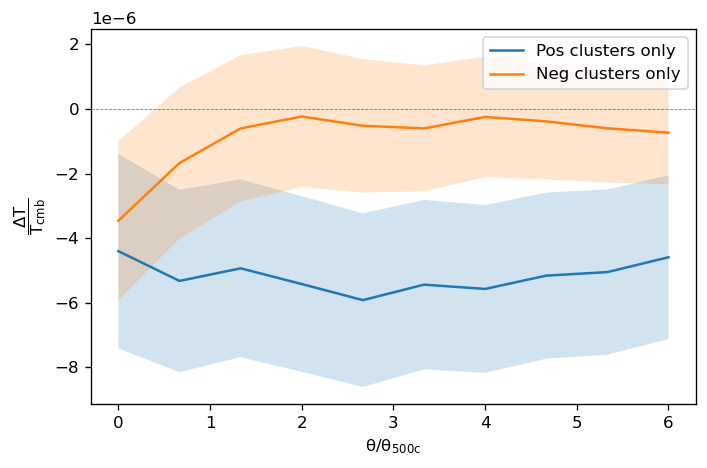

In [230]:
# Use the binner function to get the average temp for each radius
x_flip, T_avg_flip = bin_stamp(stack_flip, radii, bin_edges)
x_all, T_avg_all = bin_stamp(stack_all, radii, bin_edges)
x_pos, T_avg_pos = bin_stamp(stack_pos, radii, bin_edges)
x_neg, T_avg_neg = bin_stamp(stack_neg, radii, bin_edges)

x_axis = np.linspace(0, 6, len(x_all))

plt.figure(dpi = 120)
plt.plot(x_axis, T_avg_pos/T_cmb, 
             label = 'Pos clusters only')
plt.fill_between(x_axis, T_avg_pos/T_cmb - errors_pos/T_cmb, 
                 T_avg_pos/T_cmb + errors_pos/T_cmb, alpha=0.2)
plt.plot(x_axis, T_avg_neg/T_cmb, 
         label = 'Neg clusters only')
plt.fill_between(x_axis, T_avg_neg/T_cmb - errors_neg/T_cmb, 
                 T_avg_neg/T_cmb + errors_neg/T_cmb, alpha=0.2)


# plt.errorbar(x_axis - 0.2, T_avg_pos/T_cmb, yerr = errors_pos/T_cmb, 
#              label = 'Pos clusters only', capsize = 3, alpha = 0.5)
# plt.errorbar(x_axis - 0.1, T_avg_neg/T_cmb, yerr = errors_neg/T_cmb, 
#              label = 'Neg clusters only', capsize = 3, alpha = 0.4)

plt.axhline(y = 0, color = 'k', lw = 0.5, alpha = 0.5, ls = 'dashed')
plt.xlabel(r"$\mathrm{\theta / \theta_{500c}}$")
plt.ylabel("$\mathrm{\dfrac{\Delta T}{ T _{cmb}}}$")
plt.legend()
plt.tight_layout()
plt.savefig('Plots/stacked_profile_pos_neg.pdf')